## Hill Climbing Search Sudoku Solver 
This Sudoku solver uses a hill climbing algorithm approach into solving a 9x9 sudoku puzzle

In [ ]:

#solution
9, 8, 7, 6, 5, 4, 3, 2, 1
2, 4, 6, 1, 7, 3, 9, 8, 5
3, 5, 1, 9, 2, 8, 7, 4, 6
1, 2, 8, 5, 3, 7, 6, 9, 4
6, 3, 4, 8, 9, 2, 1, 5, 7
7, 9, 5, 4, 6, 1, 8, 3, 2
5, 1, 9, 2, 8, 6, 4, 7, 3
4, 7, 2, 3, 1, 9, 5, 6, 8
8, 6, 3, 7, 4, 5, 2, 1, 9

#problem
9, 0, 7, 6, 5, 4, 3, 2, 1
0, 4, 6, 1, 0, 3, 9, 0, 5
3, 0, 1, 9, 2, 0, 0, 4, 6
1, 2, 8, 5, 3, 7, 0, 0, 4
6, 3, 4, 0, 9, 0, 0, 5, 7
7, 9, 5, 4, 6, 1, 8, 3, 2
0, 1, 0, 2, 0, 6, 0, 7, 0
4, 7, 2, 3, 1, 9, 5, 0, 8
8, 0, 3, 0, 4, 5, 0, 1, 9

Hill Climbing
The higher the score, the better. (Max = 243)
The score reflects the number of unique values ​​per row, column, and quadrant.
0) 241/243
1) 239/243


C:\Users\Rasheed Riga\AppData\Local\Temp\ipykernel_14236\2880828540.py:98: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(board == []):


2) 234/243
3) 243/243
4) 243/243
5) 243/243
6) 243/243
7) 237/243
8) 243/243
9) 239/243
10) 236/243
11) 239/243
12) 239/243
13) 235/243
14) 239/243
15) 239/243
16) 238/243
17) 238/243
18) 235/243
19) 233/243
20) 237/243
21) 237/243
22) 243/243
23) 237/243
24) 239/243
25) 241/243
26) 241/243
27) 235/243
28) 236/243
29) 241/243
30) 237/243
31) 243/243
32) 241/243
33) 235/243
34) 239/243
35) 229/243
36) 234/243
37) 239/243
38) 235/243
39) 236/243
40) 232/243
41) 239/243
42) 239/243
43) 235/243
44) 235/243
45) 237/243
46) 243/243
47) 241/243
48) 233/243
49) 239/243
50) 233/243
51) 235/243
52) 239/243
53) 238/243
54) 239/243
55) 235/243
56) 235/243
57) 243/243
58) 233/243
59) 231/243
60) 235/243
61) 237/243
62) 235/243
63) 236/243
64) 231/243
65) 236/243
66) 237/243
67) 239/243
68) 241/243
69) 237/243
70) 241/243
71) 239/243
72) 239/243
73) 234/243
74) 238/243
75) 237/243
76) 243/243
77) 235/243
78) 238/243
79) 239/243
80) 237/243
81) 241/243
82) 233/243
83) 241/243
84) 234/243
85) 229/243


C:\Users\Rasheed Riga\AppData\Local\Temp\ipykernel_14236\2880828540.py:77: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if(board == []):


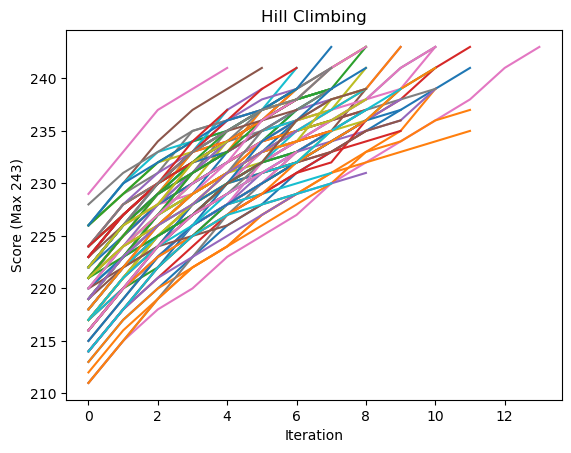

In [17]:
import numpy as np
import sys
import matplotlib.pyplot as plt
class Sudoku():

	def __init__(self):
		self.reset()

	def reset(self):
		self.board = (np.indices((9,9)) + 1)[1]
		for i in range(len(self.board)):
			self.board[i] = np.random.permutation(self.board[i])
		self.fixedValues = np.array([
			#(val, row, col)
			(9, 0, 0),
			(7, 0, 2),
			(6, 0, 3),
			(5, 0, 4),
			(4, 0, 5),
			(3, 0, 6),
			(2, 0, 7),
			(1, 0, 8),
			(4, 1, 1),
			(6, 1, 2),
			(1, 1, 3),
			(3, 1, 5),
			(9, 1, 6),
			(5, 1, 8),
			(3, 2, 0),
			(1, 2, 2),            
			(9, 2, 3),
			(2, 2, 4),
			(4, 2, 7),
			(6, 2, 8),
			(1, 3, 0),
			(2, 3, 1),
			(8, 3, 2),
			(5, 3, 3),
			(3, 3, 4),
			(7, 3, 5),
			(4, 3, 8),
			(6, 4, 0),
			(3, 4, 1),
			(4, 4, 2),            
			(9, 4, 4),
			(5, 4, 7),            
			(7, 4, 8),
			(7, 5, 0),
			(9, 5, 1),
			(5, 5, 2),
			(4, 5, 3),
			(6, 5, 4),
			(1, 5, 5),
			(8, 5, 6),   
			(3, 5, 7),             
			(2, 5, 8),
			(1, 6, 1),
			(2, 6, 3),
			(6, 6, 5),
			(7, 6, 7),
			(4, 7, 0),
			(7, 7, 1),
			(2, 7, 2),  
			(3, 7, 3),
			(1, 7, 4),
			(9, 7, 5),            
			(8, 7, 8),            
			(8, 8, 0),
			(3, 8, 2),
			(4, 8, 4),
			(5, 8, 5),  
			(1, 8, 7)
			])
		self.setup()
	
	def printBoard(self, board=[]):
		if(board == []):
			board = self.board
		
		for i in range(len(board)):
			if(i % 3 == 0 and i != 0):
				print("------+------+------")
			for j in range(len(board[i])):
				if(j % 3 == 0 and j != 0):
					sys.stdout.write("|")
				sys.stdout.write(str(board[i][j]) + " ")
			print("")

	def swapToPlace(self, val, line, col):
		valIndex = np.where(self.board[line]==val)[0][0]
		self.swap(self.board[line], valIndex, col)

	def setup(self):
		for (val, row, col) in self.fixedValues:
			self.swapToPlace(val, row, col)

	def fitness(self, board=[]):
		if(board == []):
			board = self.board
		score = 0
		rows, cols = board.shape
		for row in board:
			score += len(np.unique(row))
		for col in board.T:
			score += len(np.unique(col))
		for i in range(0, 3):
		    for j in range(0, 3):
		        sub = board[3*i:3*i+3, 3*j:3*j+3]
		        score += len(np.unique(sub))
		return score

	def swap(self, arr, pos1, pos2):
		arr[pos1], arr[pos2] = arr[pos2], arr[pos1]

	def isFixed(self, row, col):
		for t in self.fixedValues:
			if(row == t[1] and col == t[2]):
				return True
		return False

	def bestNeighbor(self):
		tempBoard = self.board.copy()
		# best = (row, (col1, col2), val)
		# col1 e col2 serão trocadas com o swap.
		best = (0, (0,0), -1)
		for i in range(len(tempBoard)):
			for j in range(len(tempBoard[i])):
				for k in range(i,len(tempBoard)):
					if(self.isFixed(i,j) or self.isFixed(i,k)):
						continue
					self.swap(tempBoard[i], j, k)
					contestant = (i, (j,k), self.fitness(tempBoard))
					if(contestant[2] > best[2]):
						best = contestant
					#Desfaz o swap para poder reutilizar o tabuleiro
					self.swap(tempBoard[i], j, k)
		return best

	def climbHill(self):
		scores = []
		maxScore = self.fitness()
		# print("Initial score: " + str(maxScore))
		while True:
			# print("Current score: " + str(maxScore))
			scores.append(maxScore)
			(row, (col1, col2), nextScore) = self.bestNeighbor()
			if(nextScore <= maxScore):
				return scores
			self.swap(self.board[row], col1, col2)
			maxScore = nextScore

sud = Sudoku()
print("Hill Climbing")
print("The higher the score, the better. (Max = 243)")
print("The score reflects the number of unique values ​​per row, column, and quadrant.")
trials = []
maxScore = -1
bestBoard = []
for i in range(100):
	sud.reset()
	finalScore = sud.climbHill()
	maxFinalScore = max(finalScore)
	if(maxScore < maxFinalScore):
		maxScore = maxFinalScore
		bestBoard = sud.board.copy()
	print(str(i) + ") " + str(finalScore[-1]) + "/243")
	if(finalScore == 243):
		print("CORRECT SOLUTION!")
		sud.printBoard()
		break
	trials.append(finalScore)
	# print(finalScore)
print("Best score: %i" % maxScore)
if maxScore==243:
    print("correct solution")
sud.printBoard(bestBoard)


for trial in trials:
	plt.plot(trial)
plt.title('Hill Climbing')
plt.ylabel('Score (Max 243)')
plt.xlabel('Iteration')
plt.show()